In [12]:
# This notebok follows https://colab.research.google.com/github/tensorflow/tflite-micro/blob/main/tensorflow/lite/micro/examples/hello_world/train/train_hello_world_model.ipynb

from pathlib import Path

MODELS_DIR = Path('./models')
MODELS_DIR.mkdir(exist_ok=True)
MODEL_TF = MODELS_DIR / 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR / 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR / 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR / 'model.cc'

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [14]:
seed = 0xdeadbeef
np.random.seed(seed)
tf.random.set_seed(seed)

[2.7986479 9.712468  7.914368  2.7459517 9.425042  7.027211  2.2453017
 8.095464  7.5136833 7.73032  ]


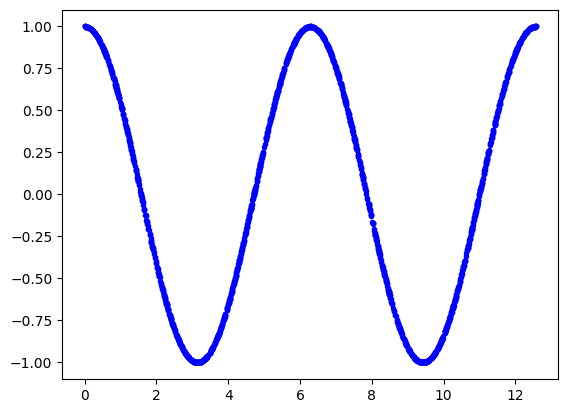

In [15]:
SAMPLES = 2000

x_values = np.random.uniform(low=0, high=4*math.pi, size=SAMPLES).astype(np.float32)
print(x_values[:10])
y_values = np.cos(x_values).astype(np.float32)
plt.plot(x_values, y_values, 'b.')
plt.show()

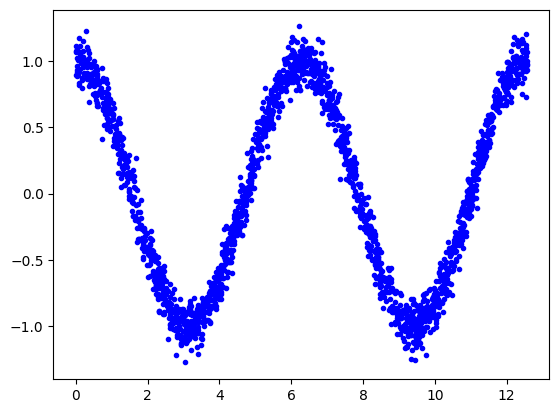

In [16]:
# add noise
y_values += 0.1 * np.random.randn(*y_values.shape)

plt.plot(x_values, y_values, 'b.')
plt.show()

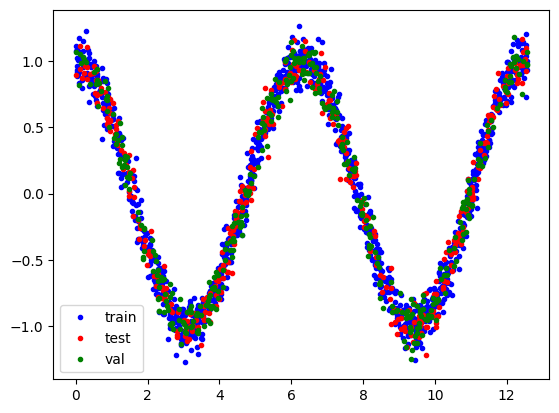

In [17]:
x_train, x_test, x_val = np.split(x_values, [int(0.6*SAMPLES), int(0.8*SAMPLES)])
y_train, y_test, y_val = np.split(y_values, [int(0.6*SAMPLES), int(0.8*SAMPLES)])

plt.plot(x_train, y_train, 'b.', label='train')
plt.plot(x_test, y_test, 'r.', label='test')
plt.plot(x_val, y_val, 'g.', label='val')
plt.legend()
plt.show()

In [18]:
model1 = keras.Sequential()
model1.add(keras.layers.Dense(16, input_shape=(1,), activation='relu'))
model1.add(keras.layers.Dense(1))
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [19]:
model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [20]:
hisory1 = model1.fit(x_train, y_train, epochs=500, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/500
19/19 [==============================] - 0s 6ms/step - loss: 10.8173 - mae: 2.8771 - val_loss: 7.4794 - val_mae: 2.3940
Epoch 2/500
19/19 [==============================] - 0s 1ms/step - loss: 5.7079 - mae: 2.0733 - val_loss: 3.7399 - val_mae: 1.6601
Epoch 3/500
19/19 [==============================] - 0s 1ms/step - loss: 2.7695 - mae: 1.4046 - val_loss: 1.7716 - val_mae: 1.0947
Epoch 4/500
19/19 [==============================] - 0s 1ms/step - loss: 1.3316 - mae: 0.9571 - val_loss: 0.9253 - val_mae: 0.8083
Epoch 5/500
19/19 [==============================] - 0s 1ms/step - loss: 0.7690 - mae: 0.7383 - val_loss: 0.6267 - val_mae: 0.6904
Epoch 6/500
19/19 [==============================] - 0s 1ms/step - loss: 0.5816 - mae: 0.6640 - val_loss: 0.5487 - val_mae: 0.6591
Epoch 7/500
19/19 [==============================] - 0s 1ms/step - loss: 0.5385 - mae: 0.6478 - val_loss: 0.5317 - val_mae: 0.6498
Epoch 8/500
19/19 [==============================] - 0s 1ms/step - loss: 0.5294 - 

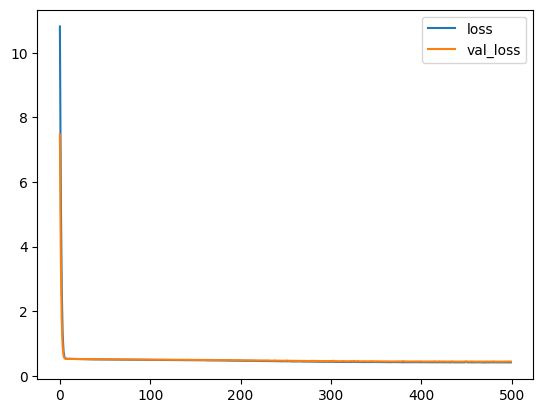

In [21]:
plt.plot(range(500), hisory1.history['loss'], label='loss')
plt.plot(range(500), hisory1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

13/13 [==============================] - 0s 444us/step


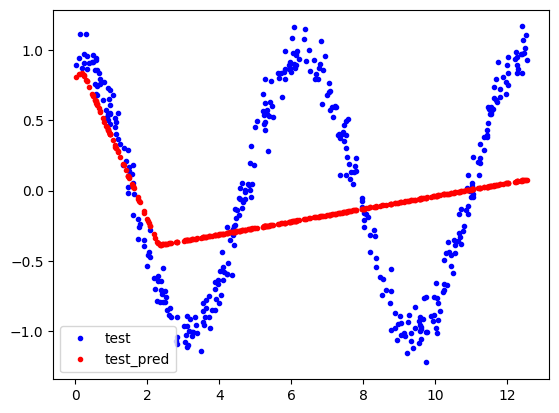

In [22]:
test_loss, test_mae = model1.evaluate(x_test, y_test)
y_test_pred = model1.predict(x_test)

plt.plot(x_test, y_test, 'b.', label='test')
plt.plot(x_test, y_test_pred, 'r.', label='test_pred')
plt.legend()
plt.show()

In [23]:
model = keras.Sequential()
model.add(keras.layers.Dense(32, input_shape=(1,), activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1))

model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                64        
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [72]:
history = model.fit(x_train, y_train, epochs=500, batch_size=64, validation_data=(x_val, y_val))
model.save(str(MODEL_TF))

Epoch 1/500
19/19 [==============================] - 0s 3ms/step - loss: 0.0175 - mae: 0.1037 - val_loss: 0.0126 - val_mae: 0.0895
Epoch 2/500
19/19 [==============================] - 0s 1ms/step - loss: 0.0144 - mae: 0.0962 - val_loss: 0.0134 - val_mae: 0.0933
Epoch 3/500
19/19 [==============================] - 0s 1ms/step - loss: 0.0140 - mae: 0.0941 - val_loss: 0.0145 - val_mae: 0.0973
Epoch 4/500
19/19 [==============================] - 0s 1ms/step - loss: 0.0151 - mae: 0.0976 - val_loss: 0.0125 - val_mae: 0.0896
Epoch 5/500
19/19 [==============================] - 0s 1ms/step - loss: 0.0141 - mae: 0.0947 - val_loss: 0.0127 - val_mae: 0.0904
Epoch 6/500
19/19 [==============================] - 0s 1ms/step - loss: 0.0142 - mae: 0.0943 - val_loss: 0.0147 - val_mae: 0.0973
Epoch 7/500
19/19 [==============================] - 0s 1ms/step - loss: 0.0150 - mae: 0.0971 - val_loss: 0.0144 - val_mae: 0.0960
Epoch 8/500
19/19 [==============================] - 0s 1ms/step - loss: 0.0170 - m

INFO:tensorflow:Assets written to: models/model/assets


INFO:tensorflow:Assets written to: models/model/assets


13/13 [==============================] - 0s 478us/step


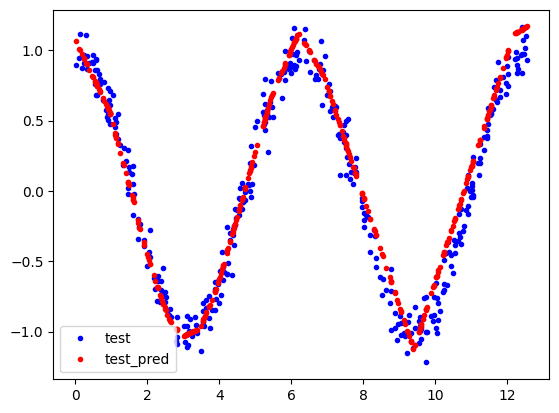

In [31]:
test_loss, test_mae = model.evaluate(x_test, y_test)
y_test_pred = model.predict(x_test)

plt.plot(x_test, y_test, 'b.', label='test')
plt.plot(x_test, y_test_pred, 'r.', label='test_pred')
plt.legend()
plt.show()

In [32]:
converter = tf.lite.TFLiteConverter.from_saved_model(str(MODEL_TF))

tflite_model_no_quant = converter.convert()
MODEL_NO_QUANT_TFLITE.write_bytes(tflite_model_no_quant)

def representative_dataset():
    for i in range(100):
        yield [x_train[i].reshape(1, 1)]


converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
converter.representative_dataset = representative_dataset
tflite_model = converter.convert()
MODEL_TFLITE.write_bytes(tflite_model)

2023-02-14 22:04:37.124714: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-02-14 22:04:37.124730: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-02-14 22:04:37.124830: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: models/model
2023-02-14 22:04:37.125528: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-02-14 22:04:37.125535: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: models/model
2023-02-14 22:04:37.127445: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-02-14 22:04:37.151245: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: models/model
2023-02-14 22:04:37.156678: I tensorflow/cc/saved_model/loader.cc:305] SavedModel load for tags { serve }; Status: success: OK. Took 31850 microseconds.

3016

In [65]:
def predict_tflite(tflite_model, x):
    x_test_ = x.copy().reshape((x.size, 1)).astype(np.float32)

    interpreter = tf.lite.Interpreter(model_content=tflite_model,
        experimental_op_resolver_type=tf.lite.experimental.OpResolverType.BUILTIN_REF)
    interpreter.allocate_tensors()

    input_details = interpreter.get_input_details()[0]
    output_details = interpreter.get_output_details()[0]
    
    input_scale, input_zero_point = input_details['quantization']
    if (input_scale, input_zero_point) != (0.0, 0):
        x_test_ = x_test_ / input_scale + input_zero_point
        x_test_ = x_test_.astype(input_details['dtype'])

    y_pred = np.empty(x_test_.size, dtype=output_details['dtype'])
    for i in range(len(x_test_)):
        interpreter.set_tensor(input_details['index'], [x_test_[i]])
        interpreter.invoke()
        y_pred[i] = interpreter.get_tensor(output_details['index'])[0]

    output_scale, output_zero_point = output_details['quantization']
    if (output_scale, output_zero_point) != (0.0, 0):
        y_pred = y_pred.astype(np.float32)
        y_pred = (y_pred - output_zero_point) * output_scale

    return y_pred

def evaluate_tflite(tflite_model, x, y_true):
    y_pred = predict_tflite(tflite_model, x)
    loss_fn = tf.keras.losses.get(model.loss)
    loss = loss_fn(y_true, y_pred).numpy()
    return loss



In [66]:
y_test_pred_tflite = predict_tflite(tflite_model, x_test)
y_test_pred_tflite_no_quant = predict_tflite(tflite_model_no_quant, x_test)
y_test_pred_tf = model.predict(x_test)

13/13 [==============================] - 0s 405us/step


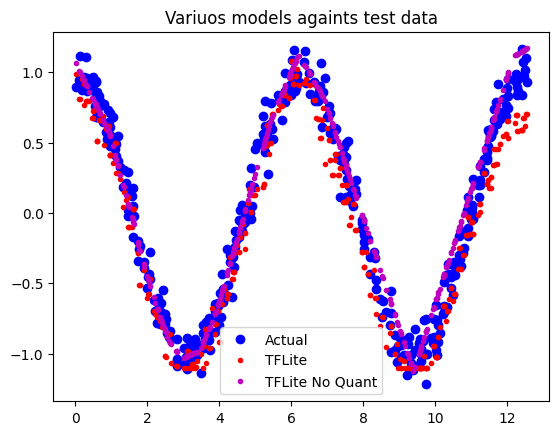

In [67]:
plt.title('Variuos models againts test data')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, y_test_pred_tflite, 'r.', label='TFLite')
plt.plot(x_test, y_test_pred_tflite_no_quant, 'm.', label='TFLite No Quant')
# plt.plot(x_test, y_test_pred_tf, 'g.', label='TF')
plt.legend()
plt.show()

In [68]:
loss_tf, _ = model.evaluate(x_test, y_test)
loss_tflite_no_quant = evaluate_tflite(tflite_model_no_quant, x_test, y_test)
loss_tflite = evaluate_tflite(tflite_model, x_test, y_test)


13/13 [==============================] - 0s 530us/step - loss: 0.0184 - mae: 0.1076


In [69]:
pd.DataFrame.from_records(
    [
        ['TF', loss_tf],
        ['TFLite No Quant', loss_tflite_no_quant],
        ['TFLite', loss_tflite]
    ],
    columns=['Model', 'Loss'], index='Model'
).round(4)

,Loss
Model,
TF,0.0184
TFLite No Quant,0.0184
TFLite,0.0365


In [74]:
def get_dir_size(path: Path) -> int:
    total_size = 0
    for entry in path.iterdir():
        if entry.is_file():
            total_size += entry.stat().st_size
        elif entry.is_dir():
            total_size += get_dir_size(entry)
    return total_size

In [77]:
size_tf = (MODEL_TF / 'saved_model.pb').stat().st_size 
size_tflite_no_quant = MODEL_NO_QUANT_TFLITE.stat().st_size
size_tflite = MODEL_TFLITE.stat().st_size
print(f'TF: {size_tf} bytes')
print(f'TFLite No Quant: {size_tflite_no_quant} bytes')
print(f'TFLite: {size_tflite} bytes')

TF: 87056 bytes
TFLite No Quant: 4344 bytes
TFLite: 3016 bytes


In [82]:
!xxd -i {str(MODEL_TFLITE)} > {str(MODEL_TFLITE_MICRO)}